<a href="https://colab.research.google.com/github/oykuturhan/Hu_BBY261_2021/blob/projeler/BBY_261_Fiinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

8
x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000
Epoch 1/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2057 - accuracy: 0.9370
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0828 - accuracy: 0.9745
Epoch 3/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0576 - accuracy: 0.9815
Epoch 4/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0445 - accuracy: 0.9854
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0539 - accuracy: 0.9837
7
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[3]


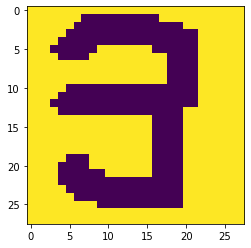

In [4]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

x_train.shape

# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=5)

model.evaluate(x_test, y_test)

image_index = 0
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

#PNG = "/content/drive/MyDrive"

from PIL import Image
import numpy as np

png = Image.open("/content/drive/MyDrive/üç.png").convert ("L")
png = np.resize(png, (28, 28, 1))
pngBinary = np.array(png)
plt.imshow(pngBinary.reshape(28, 28))

tahminEt = model.predict(pngBinary.reshape(1, 28, 28, 1))
tahminSayı = np.argmax(model.predict(pngBinary.reshape(1, 28, 28, 1)), axis=-1)

print(tahminEt)
print(tahminSayı)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')